In [2]:
!pip install yfinance==0.1.74

In [4]:
#universo ibovespa
# fator momento 6 meses
#periodo de teste: desde 2016
#numero de açoes = 10
#balanceamento: todo mes
!pip install quantstats


     -------------------------------------- 41.3/41.3 kB 165.4 kB/s eta 0:00:00


In [10]:
import yfinance as yf
import pandas as pd
import quantstats as qs

In [11]:
composicao_historica  = pd.read_excel(r'C:\Users\wesle\Downloads\composicao_ibov.xlsx')
lista_acoes = pd.read_excel(r'C:\Users\wesle\Downloads\composicao_ibov.xlsx',sheet_name = 'lista_acoes')
lista_acoes

,tickers
0,ENEV3.SA
1,SOMA3.SA
2,ELET6.SA
3,BIDI4.SA
4,RAIZ4.SA
...,...
102,VVAR11.SA
103,ABEV3.SA
104,BRPR3.SA
105,HYPE3.SA


In [12]:
#Passo2: Puxar as cotações de todas as empresas que farão parte do backtest
dados_cotacoes = yf.download(lista_acoes['tickers'].to_list(),start ='2015-06-30',end='2022-12-31')['Adj Close']
dados_cotacoes

[*********************100%***********************]  107 of 107 completed

5 Failed downloads:
- JPSA3.SA: No data found, symbol may be delisted
- BIDI4.SA: No data found, symbol may be delisted
- LCAM3.SA: No data found, symbol may be delisted
- BIDI11.SA: No data found, symbol may be delisted
- HGTX3.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668833,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.914593,16.064672,9.204787,...,29.088480,3.501015,11.896465,14.912728,NaN,6.839885,21.685196,11.133476,6.445275,13.737411
2015-07-01,14.776979,5.665764,18.623274,19.898392,NaN,NaN,NaN,2.894612,15.859567,9.145577,...,28.809891,3.475523,11.779387,14.759582,NaN,6.839885,21.480064,11.222941,6.604626,13.546080
2015-07-02,14.707459,5.631999,18.831461,20.088919,NaN,NaN,NaN,2.884622,15.813252,9.151256,...,29.154812,3.492518,11.753369,14.797868,NaN,6.839885,22.007544,11.073833,6.635140,13.622610
2015-07-03,14.792429,5.638752,18.594885,19.964663,NaN,NaN,NaN,2.857149,15.661076,9.177587,...,28.951395,3.424537,11.499700,NaN,NaN,7.655103,22.007544,NaN,6.723293,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964663,NaN,NaN,NaN,2.882124,15.780173,8.999832,...,29.185768,3.552001,11.480185,14.328854,NaN,7.655103,21.984093,10.934664,6.716509,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Passo 3: Transformar o indice em data e ordenar a série de tempo
dados_cotacoes.index = pd.to_datetime(dados_cotacoes.index)
dados_cotacoes


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668833,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.914593,16.064672,9.204787,...,29.088480,3.501015,11.896465,14.912728,NaN,6.839885,21.685196,11.133476,6.445275,13.737411
2015-07-01,14.776979,5.665764,18.623274,19.898392,NaN,NaN,NaN,2.894612,15.859567,9.145577,...,28.809891,3.475523,11.779387,14.759582,NaN,6.839885,21.480064,11.222941,6.604626,13.546080
2015-07-02,14.707459,5.631999,18.831461,20.088919,NaN,NaN,NaN,2.884622,15.813252,9.151256,...,29.154812,3.492518,11.753369,14.797868,NaN,6.839885,22.007544,11.073833,6.635140,13.622610
2015-07-03,14.792429,5.638752,18.594885,19.964663,NaN,NaN,NaN,2.857149,15.661076,9.177587,...,28.951395,3.424537,11.499700,NaN,NaN,7.655103,22.007544,NaN,6.723293,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964663,NaN,NaN,NaN,2.882124,15.780173,8.999832,...,29.185768,3.552001,11.480185,14.328854,NaN,7.655103,21.984093,10.934664,6.716509,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,33.360001,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dados_cotacoes = dados_cotacoes.sort_index()
dados_cotacoes

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,14.668833,5.577975,19.304613,19.890104,NaN,NaN,NaN,2.914593,16.064672,9.204787,...,29.088480,3.501015,11.896465,14.912728,NaN,6.839885,21.685196,11.133476,6.445275,13.737411
2015-07-01,14.776979,5.665764,18.623274,19.898392,NaN,NaN,NaN,2.894612,15.859567,9.145577,...,28.809891,3.475523,11.779387,14.759582,NaN,6.839885,21.480064,11.222941,6.604626,13.546080
2015-07-02,14.707459,5.631999,18.831461,20.088919,NaN,NaN,NaN,2.884622,15.813252,9.151256,...,29.154812,3.492518,11.753369,14.797868,NaN,6.839885,22.007544,11.073833,6.635140,13.622610
2015-07-03,14.792429,5.638752,18.594885,19.964663,NaN,NaN,NaN,2.857149,15.661076,9.177587,...,28.951395,3.424537,11.499700,NaN,NaN,7.655103,22.007544,NaN,6.723293,13.530774
2015-07-06,14.846498,5.604988,19.683134,19.964663,NaN,NaN,NaN,2.882124,15.780173,8.999832,...,29.185768,3.552001,11.480185,14.328854,NaN,7.655103,21.984093,10.934664,6.716509,13.431282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,14.620000,14.800000,9.180000,80.849998,19.981815,15.05,11.45,13.285341,35.279999,12.797479,...,12.840000,6.920000,86.320000,NaN,15.75,2.560000,37.426117,NaN,38.500000,10.050000
2022-12-26,14.520000,14.680000,9.340000,78.559998,19.891987,14.78,11.36,13.355002,35.230000,12.500530,...,12.350000,6.960000,87.110001,NaN,15.24,2.550000,36.550312,NaN,38.189999,10.190000
2022-12-27,14.520000,14.450000,9.160000,76.570000,19.263187,14.72,10.74,12.887279,34.060001,12.577163,...,12.280000,7.020000,89.190002,NaN,15.05,2.370000,36.404343,NaN,38.009998,9.900000


In [19]:
#Passo 4: Calcular o retorno 6 meses e ajustar a tabela com o fator
r6 = dados_cotacoes.resample('M').last().pct_change(periods=6).dropna(axis=0,how='all').drop('2022-12-31')
#.last significa o ultimo dado do mes
#Tinha Nan nos 6 meses iniciais pois eu não tenho os dados de 6 meses antes
r6

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.076286,-0.253431,-0.113005,NaN,NaN,NaN,-0.019676,-0.362491,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.325780,NaN,-0.781977,-0.067328,-0.708036,-0.204485,-0.222841
2016-01-31,-0.026099,0.001545,-0.266998,-0.100444,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,-0.838961,-0.182059,-0.662428,-0.167807,-0.177091
2016-02-29,-0.054421,0.251857,-0.259615,-0.178820,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,-0.707792,0.000863,-0.364170,-0.202454,0.023256
2016-03-31,-0.016942,0.232223,-0.044415,0.183737,NaN,NaN,NaN,0.435515,0.347493,0.330233,...,0.052332,-0.459701,-0.067891,-0.124446,NaN,-0.110294,0.258974,0.406566,-0.078546,-0.159575
2016-04-30,0.031436,0.167526,-0.060357,0.164969,NaN,NaN,NaN,0.561556,0.434324,0.376728,...,0.087326,-0.100719,0.154162,0.121882,NaN,0.024346,0.138833,0.442703,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.243810,-0.547151,-0.018412,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,0.000000,-0.268993,-0.491525,-0.069730,0.000000,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,0.153951,0.377360,NaN,-0.347964,-0.167555,0.240284,0.040985,...,-0.046599,-0.425352,-0.236548,0.000000,-0.217495,-0.150396,-0.150280,0.000000,-0.030147,-0.416317
2022-09-30,0.009091,-0.184120,-0.479939,0.106898,0.086093,-0.147533,-0.384615,-0.154352,0.136021,0.000961,...,-0.145272,-0.432637,-0.207386,0.000000,-0.244360,-0.235012,-0.216785,0.000000,-0.070701,-0.304705


In [20]:
#Passo 5:Classificar e retirar as empresas que não participaram do Ibovespa no periodo de tempo selecionado
for data in r6.index:
    for empresa in r6.columns:
        if empresa.replace('.SA','') not in composicao_historica.loc[:,data].to_list():
            r6.loc[data,empresa] = pd.NA



In [21]:
r6

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,NaN,-0.253431,NaN,NaN,NaN,NaN,-0.019676,-0.362491,-0.235068,...,-0.076003,-0.623786,-0.273276,-0.32578,NaN,NaN,-0.067328,NaN,<NA>,-0.222841
2016-01-31,-0.026099,NaN,-0.266998,NaN,NaN,NaN,NaN,0.030453,-0.340404,-0.260394,...,-0.150474,-0.783715,-0.445144,-0.493539,NaN,NaN,-0.182059,NaN,-0.167807,-0.177091
2016-02-29,-0.054421,NaN,-0.259615,NaN,NaN,NaN,NaN,0.116932,-0.208608,-0.034314,...,-0.003877,-0.697987,-0.327719,-0.380042,NaN,NaN,0.000863,NaN,-0.202454,0.023256
2016-03-31,-0.016942,NaN,-0.044415,NaN,NaN,NaN,NaN,0.435515,0.347493,0.330233,...,0.052332,-0.459701,-0.067891,-0.124446,NaN,NaN,0.258974,NaN,-0.078546,-0.159575
2016-04-30,0.031436,NaN,-0.060357,NaN,NaN,NaN,NaN,0.561556,0.434324,0.376728,...,0.087326,-0.100719,0.154162,0.121882,NaN,NaN,0.138833,NaN,0.068157,-0.207022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,-0.002672,-0.24381,-0.547151,<NA>,0.275232,NaN,-0.598425,-0.223076,0.147972,-0.137303,...,-0.123544,-0.431752,-0.104346,NaN,-0.268993,-0.491525,-0.069730,NaN,-0.115124,-0.396184
2022-08-31,0.004605,-0.197824,-0.464262,<NA>,0.37736,NaN,-0.347964,-0.167555,0.240284,0.040985,...,-0.046599,-0.425352,-0.236548,NaN,-0.217495,-0.150396,-0.150280,NaN,-0.030147,-0.416317
2022-09-30,0.009091,-0.18412,-0.479939,0.106898,0.086093,NaN,-0.384615,-0.154352,0.136021,0.000961,...,-0.145272,-0.432637,-0.207386,NaN,-0.24436,-0.235012,-0.216785,NaN,-0.070701,-0.304705


In [22]:
#Passo 6: Criar as carteiras de investimento em uma matriz de 0 ou 1
#rankeando as empresas
rankings = r6.rank(axis =1, ascending = False)
rankings

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,18.0,NaN,40.0,NaN,NaN,NaN,NaN,15.0,49.0,34.0,...,20.0,56.0,42.0,45.0,NaN,NaN,19.0,NaN,NaN,31.0
2016-01-31,13.0,NaN,37.0,NaN,NaN,NaN,NaN,10.0,43.0,35.0,...,22.0,57.0,49.0,50.0,NaN,NaN,29.0,NaN,26.0,27.0
2016-02-29,30.0,NaN,45.0,NaN,NaN,NaN,NaN,13.0,40.0,29.0,...,23.0,57.0,48.0,50.0,NaN,NaN,22.0,NaN,39.0,20.0
2016-03-31,36.0,NaN,39.0,NaN,NaN,NaN,NaN,7.0,11.0,14.0,...,34.0,56.0,41.0,46.0,NaN,NaN,18.0,NaN,42.0,47.0
2016-04-30,39.0,NaN,43.0,NaN,NaN,NaN,NaN,5.0,8.0,14.0,...,36.0,47.0,29.0,33.0,NaN,NaN,31.0,NaN,38.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,28.0,61.0,87.0,NaN,8.0,NaN,88.0,60.0,14.0,49.0,...,47.0,79.0,42.0,NaN,65.0,83.0,34.0,NaN,46.0,75.0
2022-08-31,40.0,65.0,90.0,NaN,8.0,NaN,78.0,63.0,14.0,35.0,...,47.0,87.0,69.0,NaN,67.0,61.0,60.0,NaN,43.0,86.0
2022-09-30,26.0,57.0,85.0,12.0,15.0,NaN,77.0,53.0,11.0,30.0,...,51.0,83.0,59.0,NaN,66.0,64.0,60.0,NaN,39.0,67.0


In [23]:
carteiras = r6.rank(axis =1, ascending = False).applymap(lambda x: 1 if x< 11 else 0)
carteiras

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-01-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-02-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-03-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-30,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-08-31,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-09-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Passo 7: Calcular o retorno mensal das empresas no periodo de backtest
retorno_mensal = dados_cotacoes.resample('M').last().pct_change(periods=1)
retorno_mensal = retorno_mensal.drop(retorno_mensal.index[:7],axis =0)
retorno_mensal.index = carteiras.index
retorno_mensal

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AURE3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,...,UGPA3.SA,USIM5.SA,VALE3.SA,VALE5.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,VVAR11.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,0.045378,0.023876,-0.129350,-0.095238,NaN,NaN,NaN,-0.057851,-0.060380,-0.043574,...,-0.017701,-0.451613,-0.254029,-0.293659,NaN,-0.173333,-0.083431,-0.107034,0.034114,-0.160573
2016-01-31,-0.048030,0.219479,-0.128959,-0.062632,NaN,NaN,NaN,0.132553,-0.022383,0.188885,...,0.064734,0.058823,0.215021,0.182321,NaN,0.814516,0.095162,0.482876,-0.142028,0.089667
2016-02-29,0.065760,-0.123003,0.229437,0.311061,NaN,NaN,NaN,0.320998,0.475473,0.293587,...,0.111854,1.011111,0.282811,0.329439,NaN,0.075556,0.130946,0.286374,0.069196,-0.071317
2016-03-31,0.031383,0.193548,-0.035211,0.038544,NaN,NaN,NaN,0.119218,0.118361,0.027805,...,0.036348,0.381216,0.299670,0.383128,NaN,0.227522,-0.009379,0.100806,0.080427,0.034552
2016-04-30,-0.014440,0.084495,-0.277372,0.026240,NaN,NaN,NaN,-0.067894,-0.249184,-0.126903,...,-0.057581,-0.332000,-0.277806,-0.285896,NaN,-0.124579,-0.030320,0.016313,-0.052042,-0.085088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-31,0.022773,-0.061392,0.167143,0.167404,0.160252,0.083157,0.405797,0.068530,0.164769,0.095988,...,0.066194,-0.068525,-0.027340,0.000000,0.102703,0.341667,-0.077578,0.000000,0.008916,-0.070943
2022-08-31,0.017682,0.030523,0.039168,0.065043,-0.045677,-0.118412,-0.107338,0.108099,-0.069854,0.030794,...,-0.133038,-0.062344,0.116899,0.000000,-0.042928,-0.009317,-0.011481,0.000000,0.137732,0.173842
2022-09-30,0.029601,0.032440,-0.084806,0.061884,0.129345,0.101107,0.095788,0.152490,-0.038941,0.021246,...,0.143223,-0.038564,-0.068157,0.000000,0.057971,-0.018809,0.020252,0.000000,0.253267,0.116263


In [26]:
#Passo 8: Cruzar a matriz de retorno mensal com a matriz das carteiras para chegar na rentabilidade do modelo
retorno_modelo = (retorno_mensal * carteiras).sum(axis =1)/10
retorno_modelo

Date
2015-12-31   -0.043231
2016-01-31    0.076903
2016-02-29    0.091320
2016-03-31    0.165053
2016-04-30   -0.164843
                ...   
2022-07-31    0.114667
2022-08-31   -0.060277
2022-09-30    0.089395
2022-10-31   -0.138985
2022-11-30   -0.024385
Freq: M, Length: 84, dtype: float64

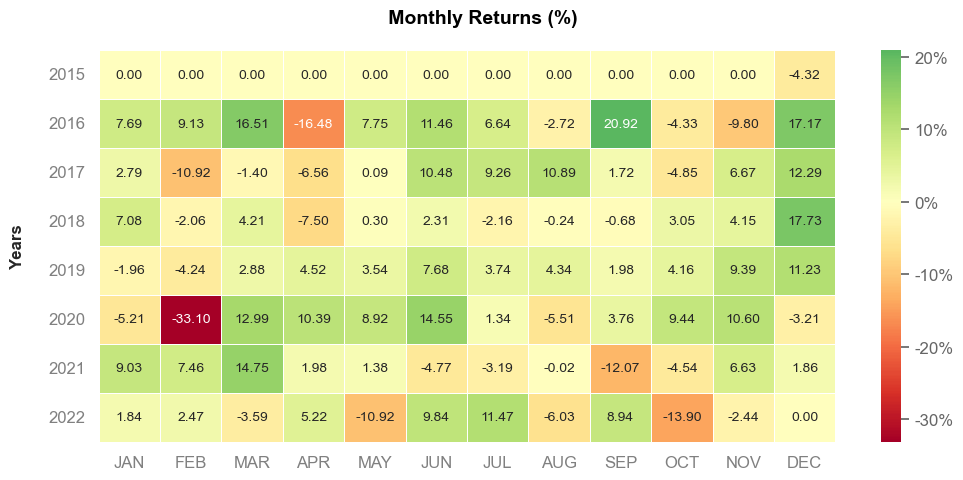

In [28]:
#Visualizar a rentabilidade do modelo com qunatstats
qs.extend_pandas()
retorno_modelo.plot_monthly_heatmap()

In [29]:
#Passo 9: Puxar e calcular a rentabilidade do Ibovespa no período
ibovespa = yf.download("^BVSP",start = '2015-12-30',end='2022-12-31')['Adj Close']
ibovespa = ibovespa.resample('M').last().pct_change().dropna()
ibovespa

[*********************100%***********************]  1 of 1 completed


Date
2016-01-31   -0.067912
2016-02-29    0.059100
2016-03-31    0.169673
2016-04-30    0.077035
2016-05-31   -0.100889
                ...   
2022-08-31    0.061629
2022-09-30    0.004693
2022-10-31    0.054527
2022-11-30   -0.030602
2022-12-31   -0.021825
Freq: M, Name: Adj Close, Length: 84, dtype: float64

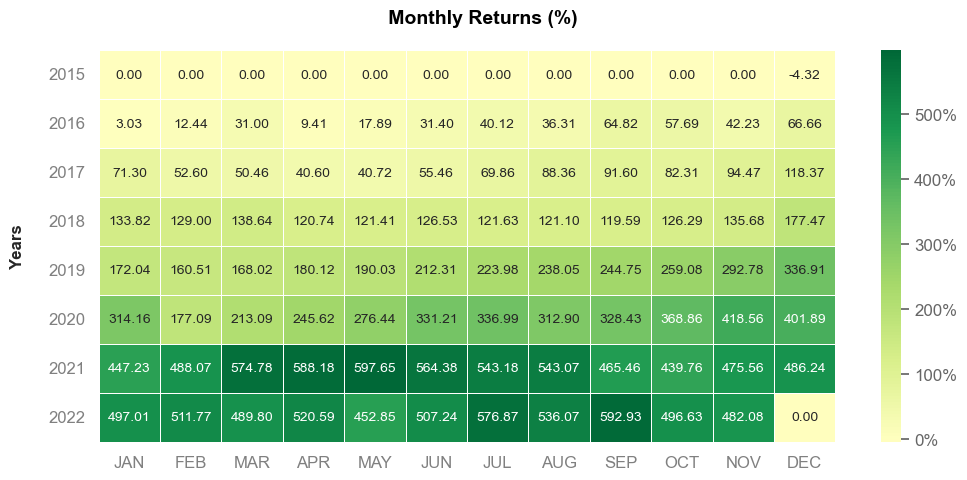

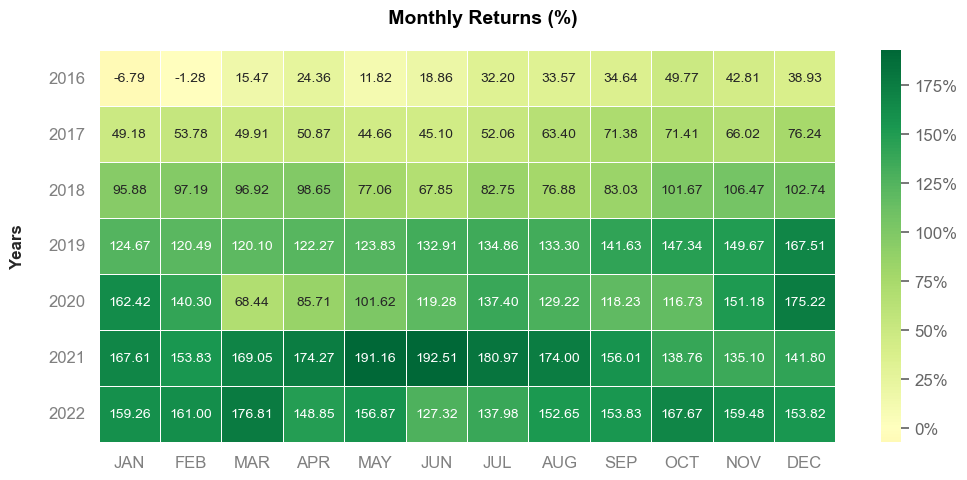

In [30]:
#Passo 10: Calcular e visualizar as rentabilidades do modelo contra o Ibovespa.
retorno_acum_modelo = (1+retorno_modelo).cumprod()-1
retorno_acum_ibov = (1+ibovespa).cumprod() - 1
retorno_acum_modelo.plot_monthly_heatmap()
retorno_acum_ibov.plot_monthly_heatmap()

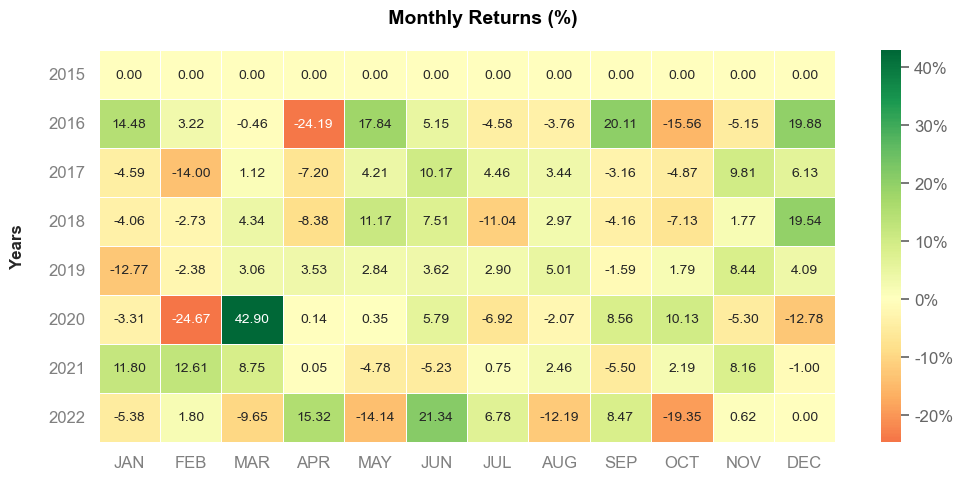

In [32]:
#Passo 11 = calcular e visualizar as rentabiçidades do modelo mes a mes contra o Ibovespa
ganhos_modelo = retorno_modelo - ibovespa
ganhos_modelo.plot_monthly_heatmap()